t0, tn, dt, nt; 0.0000 90.0000 0.1000 901


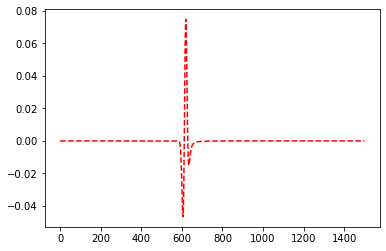

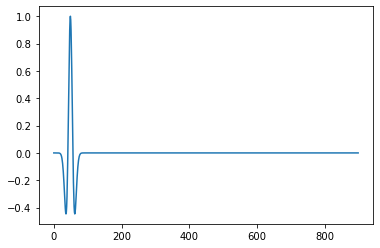

In [1]:
import numpy as np
from scipy.special import hankel2
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
nt = 901
# Time axis
dt = 0.1
t0 = 0.
tn = dt * (nt-1)
time = np.linspace(t0, tn, nt)
print("t0, tn, dt, nt; %.4f %.4f %.4f %d" % (t0, tn, dt, nt))
# Source peak frequency in KHz
f0 = .3


def ricker(f, T, dt, t0):
    t = np.linspace(-t0, T-t0, int(T/dt))
    tt = (np.pi**2) * (f**2) * (t**2)
    y = (1.0 - 2.0 * tt) * np.exp(- tt)
    return y

# Source and receiver geometries
src_coordinates = np.empty((1, 2))
src_coordinates[0, :] = 200.

# Single receiver offset 100 m from source
rec_coordinates = np.empty((1, 2))
rec_coordinates[:, :] = 260.

sx, sz = src_coordinates[0, :]
rx, rz = rec_coordinates[0, :]
def analytical(nt, dt, time):
    # Fourier constants
    nf = int(nt/2 + 1)
    fnyq = 1. / (2 * dt)
    df = 1.0 / time[-1]
    faxis = df * np.arange(nf)

    wavelet = ricker(f0, time[-1], dt, 1.5/f0)
    c0 = 1.5
    # Take the Fourier transform of the source time-function
    R = np.fft.fft(wavelet)
    R = R[0:nf]
    nf = len(R)

    # Compute the Hankel function and multiply by the source spectrum
    U_a = np.zeros((nf), dtype=complex)
    for a in range(1, nf-1):
        k = 2 * np.pi * faxis[a] / c0
        tmp = k * np.sqrt(((rx - sx))**2 + ((rz - sz))**2)
        U_a[a] = -1j * np.pi * hankel2(0.0, tmp) * R[a]

    # Do inverse fft on 0:dt:T and you have analytical solution
    U_t = 1.0/(2.0 * np.pi) * np.real(np.fft.ifft(U_a[:], nt))

    # The analytic solution needs be scaled by dx^2 to convert to pressure
    return np.real(U_t) * (2**2),wavelet
   

time1 = np.linspace(0.0, 3000., 30001)
U_t, temp= analytical(30001, 0.1, time1)

U_t = U_t[0:1501]
plt.figure()
plt.plot(U_t[:], '--r', label='analytical')
plt.figure()
plt.plot(temp[1:nt])
import pandas as pd
pd.DataFrame(U_t).to_csv('out.csv')
pd.DataFrame(temp).to_csv('seismic.csv')

In [ ]:
U_t